# Improving in Chess

Historically traced throughout history as a game supposedly originating from India nearly 1500 years ago, chess has become one of the most popular and well known games around the world to this day. Garnishing a community of its own with millions of players and an international audience as a sport filled with prestige that continues to grow each year. Beloved for its complexity as a game with seemingly endless possibilities in terms of permutations players will face and the countless strategies individuals can approach each match with in order to win. Additionally, unlike the game of checkers, chess remains a game that is yet to be solved. Meaning that there is no definite answer known at this time on how individuals should play each match in order to guarantee a win. Thus, from the data available, I will be exploring the relations between different some surface level factors that contribute to winning in a chess game and explore optimal way individuals can approaches the game to improve.

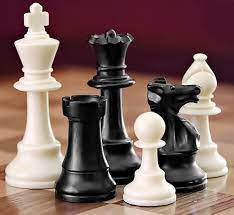
<p style="font-size: x-small">Alan Light, Public domain, via <a href="https://en.wikipedia.org/wiki/Chess">[Wikimedia]</p>

## Methods
### Data Collection
The subset of data used for this analysis on chess is from Mitchell J's [Chess Game Dataset](https://www.kaggle.com/datasets/datasnaek/chess) on Kaggle, a online resource that provides free datasets to use.

In [435]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [436]:
chessData = pd.read_csv("games.csv")

### Data Cleaning
From the chess dataset, some colums were remaned for formatting or removed if they were unnessesary for this analysis. Additionally, I also generalized the some of the data and added a new column combining two others to analyze.

In [437]:
# Set the default apperance/size of all figures
sns.set(rc={'figure.figsize':(16,8)})
# Removed all non-ranked games
chessData = chessData.drop(chessData[chessData["rated"] == False].index)
# Removes all games with a draw
chessData = chessData.drop(chessData[chessData["winner"] == "draw"].index)
# Removed nearly 5000 entries to make it easier to visualize
chessData = chessData.drop(chessData.index[15000:])
# Droped unnessesary elements
chessData = chessData.drop(columns=["rated","id","created_at","last_move_at","increment_code","white_id",
                                    "black_id","opening_eco","moves","opening_ply"])
# Remane columns
chessData = chessData.rename(columns={"turns":"Turns","victory_status":"Victory Status","winner":"Winner",
                                      "white_rating":"White Rating","black_rating":"Black Rating",
                                      "opening_name":"Opening Name"})
# Generalizes the different openings
chessData["Opening Name"] = chessData["Opening Name"].str.replace(":.*","",regex=True)
chessData["Opening Name"] = chessData["Opening Name"].str.replace("Queen's Pawn.*","Queen's Pawn Game",regex=True)
chessData["Opening Name"] = chessData["Opening Name"].str.replace(" [#]\d","",regex=True)
chessData["Opening Name"] = chessData["Opening Name"].str.replace("(Declined|Refused|Accepted)","",regex=True)
chessData["Opening Name"] = chessData["Opening Name"].str.replace(" [|].*","",regex=True)
chessData["Opening Name"] = chessData["Opening Name"].str.replace("( $)","",regex=True)
# New column for the average rating of the two players
chessData["Game Rating"] = (chessData["Black Rating"]+chessData["White Rating"])/2
# Groups the new column into different ranges
ratingCondition = [chessData["Game Rating"].lt(1000),
             chessData["Game Rating"].ge(1000) & chessData["Game Rating"].lt(1250),
             chessData["Game Rating"].ge(1250) & chessData["Game Rating"].lt(1500),
             chessData["Game Rating"].ge(1500) & chessData["Game Rating"].lt(1750),
             chessData["Game Rating"].ge(1750) & chessData["Game Rating"].lt(2000),
             chessData["Game Rating"].ge(2000) & chessData["Game Rating"].lt(2250),
             chessData["Game Rating"].ge(2250)]
ratingIndex = ["< 1000","1000 < 1250","1250 < 1500","1500 < 1750","1750 < 2000","2000 < 2250", "2250 <"]
chessData["Game Rating"] = np.select(ratingCondition,ratingIndex)
# New column to differentiate who has the higher rating in a match
chessData["Higher Rated"] = chessData["White Rating"] - chessData["Black Rating"]
ratingConditionPlayer = [chessData["Higher Rated"].lt(0),chessData["Higher Rated"].gt(0),chessData["Higher Rated"].eq(0)]
ratingIndexPlayer = ["Black","White","Equal"]
chessData["Higher Rated"] = np.select(ratingConditionPlayer,ratingIndexPlayer)

## Analyses
Analyzing this dataset, I will exlpore the factors such as number of turns, rating, chess sides, and openings that contribute to a win for either white or black through a statistical summary and visualisation of this data.

### Distributions of Wins

Beginning with the distribution of win, the figure below displays the number of wins either sides have from the dataset, split by the rating of players in a set interval. As shown between either sides, white wins more often than black among the center intervals where the majority of people lie in terms of rating while with the highest and lowest rated players this difference closes.


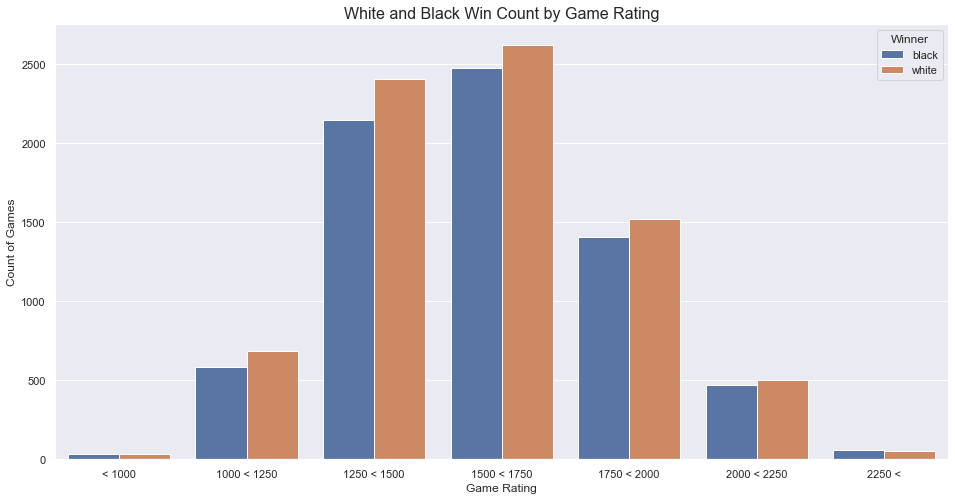

In [438]:
ratingWinPlot = sns.countplot(data=chessData,x="Game Rating",hue="Winner",order=ratingIndex)
ratingWinPlot.set(ylabel="Count of Games")
ratingWinPlot = ratingWinPlot.set_title("White and Black Win Count by Game Rating",fontsize=16)


Comparing the count of games where either black or white is a higher rating we see that in the majority of games the white side usually has the higher rated player. Coinsiding with the graph above, this shows that there is a relation between rating and the winner of a match.

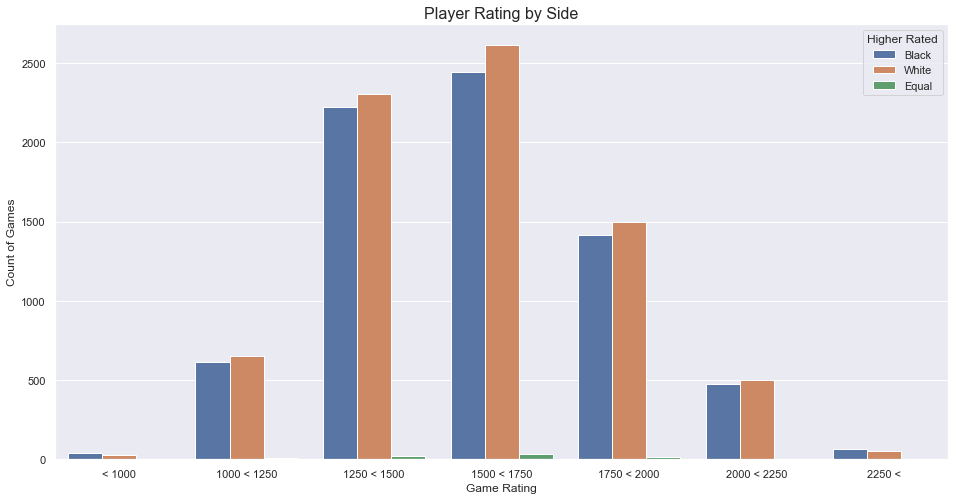

In [439]:
ratingPlayerPlot = sns.countplot(data=chessData,x="Game Rating",hue="Higher Rated",order=ratingIndex,hue_order=ratingIndexPlayer)
ratingPlayerPlot.set(ylabel="Count of Games")
ratingPlayerPlot = ratingPlayerPlot.set_title("Player Rating by Side",fontsize=16)

In the figure below, the resulting status of matches across all games played and recoreded in this dataset are displayed regardless of rating.
Further emphasizing the difference between sides with white winning 3% more through checkmates, losing 1% less than black by running out of time and winnig 2% more through making black resign.

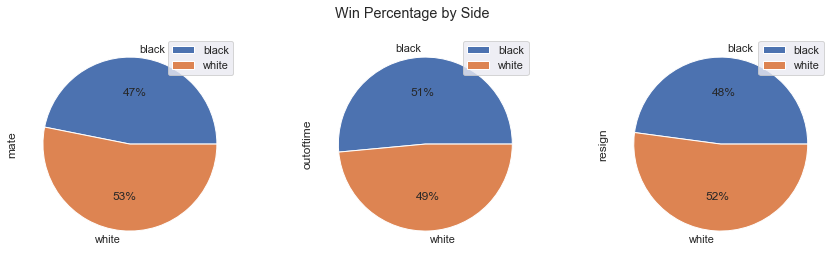

In [440]:
winPlot = chessData.groupby(["Winner","Victory Status"]).size().unstack()
winPlot = winPlot.plot.pie(subplots=True,autopct='%.0f%%',figsize=(15,4),title="Win Percentage by Side")

Examining these graphs we can see that the white side wins and hold the higher rating in the majority of games, suggesting that the rating of a player holds as a factor in detemining who will win. Additionally, over all intervals of rating we can see that the side a individual plays on to have a factor in determining who will win in a game. Shown with the difference in the count of wins among the center intervals in the number of white wins compared to black. Interestingly, among the highest and lowest rated players, this difference becomes nearly unnoticeable, further emphasizing the idea that game rating also plays a factor in who wins as players in the game either understand how to even out the advantage of white (highest intervals) or are unable to take advantage of white (lowest interval). 

### Rating and Turns Taken
Among the varying rating of players and number of turns taken to win, a positive progression is displayed as player rating increases alongside the average number of turns taken in a single game.

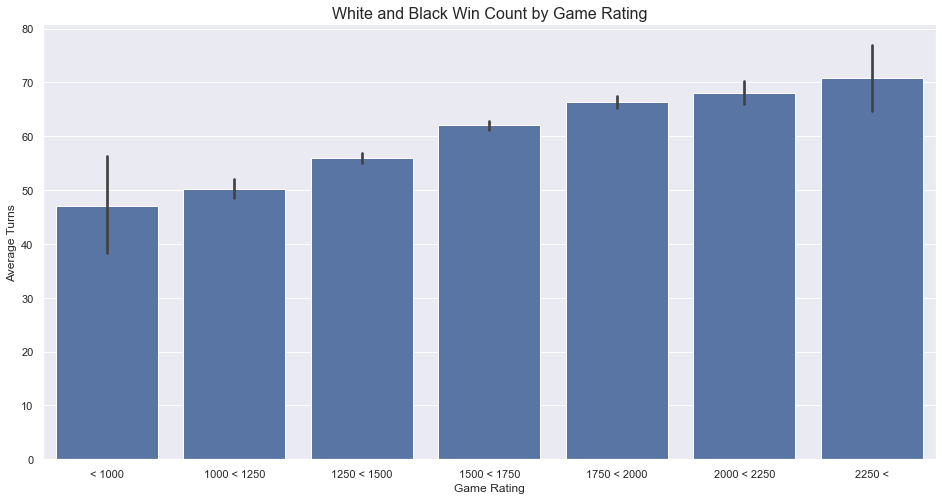

In [441]:
avgTurnPlot = sns.barplot(data=chessData,x="Game Rating",y="Turns",order=ratingIndex,color="#4c72b0")
avgTurnPlot.set(ylabel="Average Turns")
avgTurnPlot = avgTurnPlot.set_title("White and Black Win Count by Game Rating",fontsize=16)

We can further examine how either sides should play given this data. Below the figure shows that among either sides, white wins more often when games have lower turn counts while black wins more often when games get prolonged. 

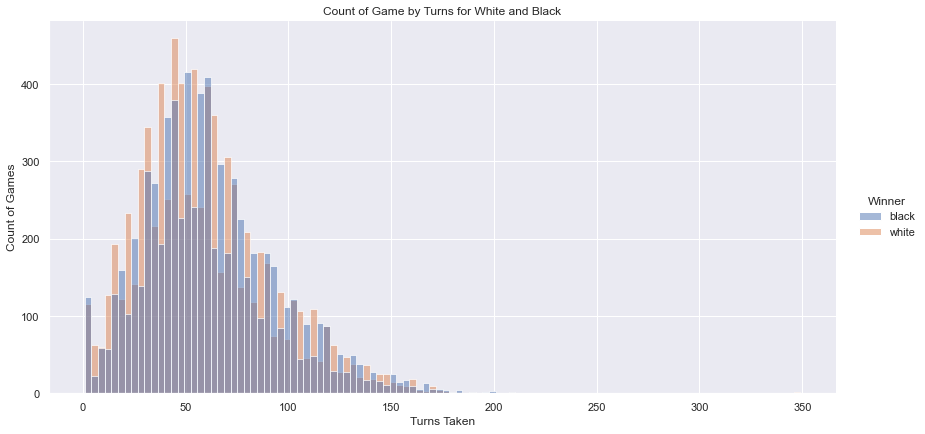

In [442]:
turnPlot = sns.displot(data=chessData,x="Turns",hue="Winner",height=6,aspect=2)
turnPlot = turnPlot.set(xlabel="Turns Taken",ylabel="Count of Games",title="Count of Game by Turns for White and Black")

From these two graph, the data suggest that an individuals focus on improving should be around their end game as they climb in ratings as games increasing in length on average. Additoinally, it also suggest that if a playing is on the black side, they should focus on delaying the game by trying to match the pace of white and capitalize on mistakes. While the opposite is true for white as they win more often in games that are shorter, meaning that white should abuse their advantage of moving first to control the pace of the game and practice being able to end games early. 

### Perferred Opening

Among the varying opening, the list below shows the top 15 most used openings and the count which side won as a result.

In [443]:
# Finds the top 15 openings by finding the total number of games they are played as a new columns as well as adding a win percentage column
opening = chessData.groupby(["Opening Name","Winner"]).size().unstack()
opening[opening.isna()] = 0
opening["total"] = opening["black"]+opening["white"]
opening["win percentage"] = round(opening["white"]/opening["total"]*100,2)
topOpening = opening.nlargest(15,"total")
print(topOpening)

Winner                 black  white   total  win percentage
Opening Name                                               
Sicilian Defense      1031.0  931.0  1962.0           47.45
French Defense         532.0  566.0  1098.0           51.55
Queen's Pawn Game      510.0  517.0  1027.0           50.34
Italian Game           368.0  385.0   753.0           51.13
Queen's Gambit         306.0  416.0   722.0           57.62
King's Pawn Game       349.0  349.0   698.0           50.00
Ruy Lopez              280.0  324.0   604.0           53.64
Scandinavian Defense   266.0  287.0   553.0           51.90
Philidor Defense       214.0  317.0   531.0           59.70
English Opening        217.0  304.0   521.0           58.35
Caro-Kann Defense      217.0  232.0   449.0           51.67
Scotch Game            161.0  194.0   355.0           54.65
Van't Kruijs Opening   197.0   97.0   294.0           32.99
Four Knights Game      119.0  149.0   268.0           55.60
Bishop's Opening        88.0  155.0   24

The graph below shows a visual representation of the list above, displaying the number of wins for either side among the top 15 most used openings.

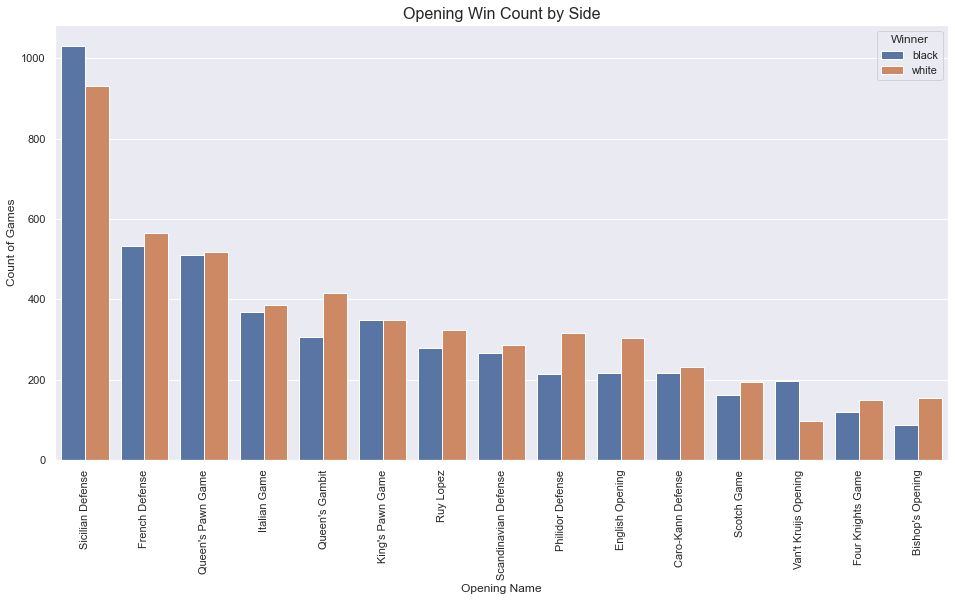

In [444]:
topOpeningPlot = sns.countplot(data=chessData,x="Opening Name",hue="Winner",order=topOpening.index)
topOpeningPlot.set(ylabel="Count of Games")
topOpeningPlot.set_title("Opening Win Count by Side",fontsize=16)
topOpeningPlot = topOpeningPlot.set_xticklabels(topOpeningPlot.get_xticklabels(), rotation=90)

We can further analyze this data by looking at the specific win percentage of the top 15 most used openings.

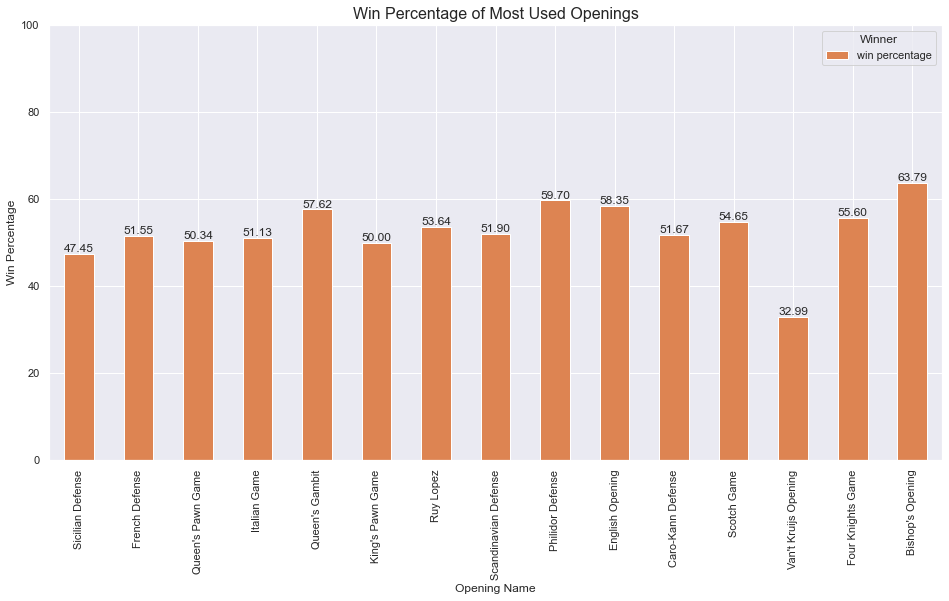

In [445]:
topOpeingWinRate = topOpening
topOpeingWinRate = topOpeingWinRate.drop(columns={"black","white","total"})
topOpeingWinRate = topOpeingWinRate.head(15).plot.bar(color="#dd8452",ylabel="Win Percentage",title="Win Percentage of Most Used Openings")
topOpeingWinRate.title.set_size(16)
topOpeingWinRate = topOpeingWinRate.bar_label(topOpeingWinRate.containers[0], fmt='%.2f')
topOpeningPlot = plt.ylim(0,100)

From the two graphs we can see that the Sicilian Defense is by far the most common opening despite having a low win percentage at 47.45%. Suggesting that players should practice and prepare against the Sicilian Defense when playing black as its the most likely opening white will play. Similarly, this also suggest that, when playing on the white side, players should reconsider using the Sicilian Defense as it has a win percentage less than 50% and consider using openings such as the Queen's Gambit or the Philidor Defense.

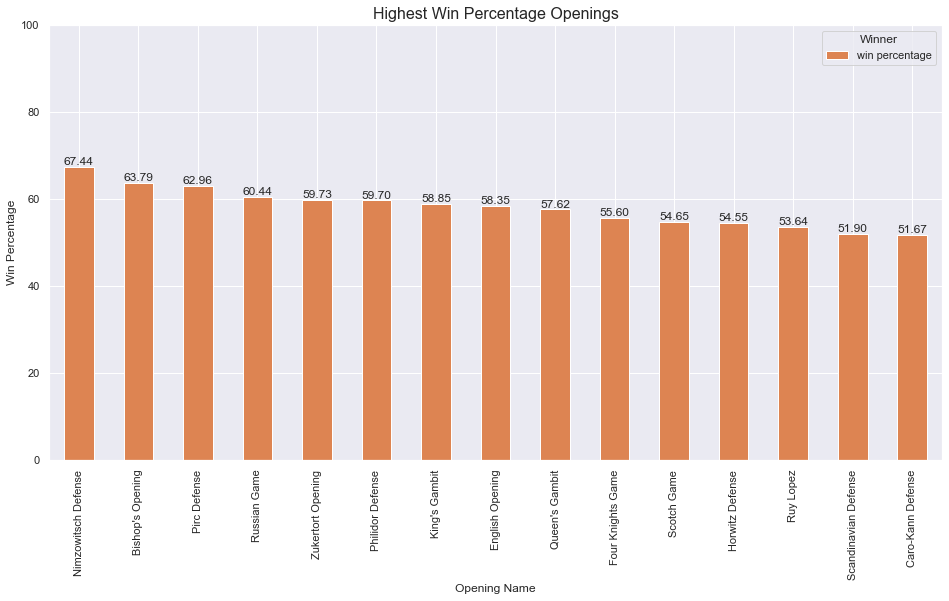

In [446]:
# Excluding openings with less than 150 games, finds the openings with the highest win percentage
openingWinRate = opening
openingWinRate = openingWinRate[openingWinRate["total"] > 150]
openingWinRate = openingWinRate.sort_values("win percentage",ascending=False)
openingWinRate = openingWinRate.drop(columns={"black","white","total"})
openingWinRate = openingWinRate.head(15).plot.bar(color="#dd8452",ylabel="Win Percentage",title="Highest Win Percentage Openings")
openingWinRate.title.set_size(16)
openingWinRate = openingWinRate.bar_label(openingWinRate.containers[0], fmt='%.2f')
topOpeningPlot = plt.ylim(0,100)

Further examing this data, the graph below show the top 15 openings with the highest overall win percentage given there is sufficient data, ie. the opening has been used in more than 150 games. As we see, the Nimzowitsch Defense holds the highest win percentage with the Bishop's Opening and Pirc Defense following behind and suggest that players should look into these openings.

## Disscusion
In this assignment, I have explored a dataset detailing various chess games played online with my focuse on exploring the surface level factors that contribute to a victor in a chess game and some optimization players make to improve. From my work I have found both the side an individual plays on and the rating of the game to be a factor affecting the victor in a game of chess. Evidently shown from the difference in games won by white in comparision to black as well as the the distribution of wins the evens out among certain intervals of game rating. Additionally, resulting these factors, a relation with these factors and the average number of turns is displayed. With the average of turns taken in a game increasing with rating as well as showing white winning in games with less moves on average. Showing a change in which players should make to improve as the higher rated a player becomes the more they can expect games to be drawn out and the play style they should use when playing on white or black. Finally, the various opneings also reflect a factor that contributes to a victor as selecting the right one to use is essential for white in order to maintain their advantage as blacks reation to the opening.

## References
1. Source data - https://www.kaggle.com/datasets/datasnaek/chess
2. Pandas for data manipulation
3. Seaborn for data visualization
4. Matplotlib for data visualization 